In [1]:
from __future__ import absolute_import,division,print_function
import codecs#encoding,word embedding
import glob#find all filenames matching a pattern
import logging#log events for libraries
import multiprocessing#concurrency
import os#dealing with operating system like reading file
import pprint#pretty print, human readable
import re#regular expression
import nltk#natural language toolkit
import gensim.models.word2vec as w2v#word2vec
import sklearn.manifold#dimensionality reduction
import numpy as np#math
import matplotlib.pyplot#plotting
import pandas as pd#parse dataset
import seaborn as sns#visualization
from sklearn.decomposition import PCA
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

unable to import 'smart_open.gcs', disabling that module


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [4]:
#process our data
#clean data
#stopwords like the at a an, unnecesasry
#tokenization into sentences, punkt 
#http://www.nltk.org/
nltk.download("punkt")#pretrained tokenizer
nltk.download("stopwords")#words like,and,the,an,of,a

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vinay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vinay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
#get the paper names,matching text files
book_filenames = sorted(glob.glob("*.txt"))

In [9]:
     #print papers
print("Found papers:")
book_filenames

Found papers:


['icse.txt', 'sigmod.txt', 'vldb.txt']

In [10]:
#step 1 process data
#initialize rawunicode , we'll add all text to a big file in memory
corpus_raw = u""
#for each book, read it, open it un utf 8 format, 
#add it to the raw corpus
for book_filename in book_filenames:
    print("Reading '{0}'...".format(book_filename))
    with codecs.open(book_filename, "r", "utf-8") as book_file:
        corpus_raw += book_file.read()
    print("Corpus is now {0} characters long".format(len(corpus_raw)))
    print()

Reading 'icse.txt'...
Corpus is now 2534815 characters long

Reading 'sigmod.txt'...
Corpus is now 3498962 characters long

Reading 'vldb.txt'...
Corpus is now 4385305 characters long



In [11]:
#tokenizastion! saved the trained model here
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [12]:
#tokenize into sentences
raw_sentences = tokenizer.tokenize(corpus_raw)

In [13]:
#convert into list of words
#remove unecessary characters, split into words, no hyhens and shit
#split into words
def sentence_to_wordlist(raw):
    clean = re.sub("[^a-zA-Z]"," ", raw)
    words = clean.split()
    return words

In [14]:
#for each sentece, sentences where each word is tokenized
sentences = []
for raw_sentence in raw_sentences:
    if len(raw_sentence) > 0:
        sentences.append(sentence_to_wordlist(raw_sentence))

In [12]:
#print an example
print(raw_sentences[3])
print(sentence_to_wordlist(raw_sentences[5]))

why use the model driven architecture to design and build distributed applications	2005	2005/05/15	10.1109/ICSE.2005.1553538	international conference on software engineering	icse		45FFFB88	17076
0A7D0D1F	Formal Methods in Energy Informatics	formal methods in energy informatics	2011	2011/11/14	10.1007/978-3-642-24690-6_1	international conference on software engineering	icse		45FFFB88	18687
483FD845	A Study on the Specification for e-Business Agent Oriented Component Based Development	a study on the specification for e business agent oriented component based development	2003	2003/06/25	10.1007/978-3-540-24675-6_12	international conference on software engineering	icse		45FFFB88	19483
7D616DBF	The application of digital signal processing (DSP) for the real time solving of artillery fire control exterior trajectory	the application of digital signal processing dsp for the real time solving of artillery fire control exterior trajectory	2012	2012/06	10.1109/ICSESS.2012.6269399	international co

In [15]:
#count tokens, each one being a sentence
token_count = sum([len(sentence) for sentence in sentences])
print("The book corpus contains {0:,} tokens".format(token_count))

The book corpus contains 512,696 tokens


In [16]:
#ONCE we have vectors
#step 3 - build model
#3 main tasks that vectors help with
#DISTANCE, SIMILARITY, RANKING

# Dimensionality of the resulting word vectors.
#more dimensions, more computationally expensive to train
#but also more accurate
#more dimensions = more generalized
num_features = 300
# Minimum word count threshold.
min_word_count = 3

# Number of threads to run in parallel.
#more workers, faster we train
num_workers = multiprocessing.cpu_count()

# Context window length.
context_size = 7

# Downsample setting for frequent words.
#0 - 1e-5 is good for this
downsampling = 1e-3

# Seed for the RNG, to make the results reproducible.
#random number generator
#deterministic, good for debugging
seed = 1

In [17]:
thrones2vec = w2v.Word2Vec(
    sg=1,
    seed=seed,
    workers=num_workers,
    size=num_features,
    min_count=min_word_count,
    window=context_size,
    sample=downsampling
)

In [18]:
#train model on sentences
thrones2vec.build_vocab(sentences)

2020-04-21 20:06:42,372 : INFO : collecting all words and their counts
2020-04-21 20:06:42,374 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-04-21 20:06:42,561 : INFO : collected 23098 word types from a corpus of 512696 raw words and 349 sentences
2020-04-21 20:06:42,561 : INFO : Loading a fresh vocabulary
2020-04-21 20:06:42,618 : INFO : effective_min_count=3 retains 8360 unique words (36% of original 23098, drops 14738)
2020-04-21 20:06:42,619 : INFO : effective_min_count=3 leaves 493336 word corpus (96% of original 512696, drops 19360)
2020-04-21 20:06:42,669 : INFO : deleting the raw counts dictionary of 23098 items
2020-04-21 20:06:42,671 : INFO : sample=0.001 downsamples 39 most-common words
2020-04-21 20:06:42,672 : INFO : downsampling leaves estimated 315763 word corpus (64.0% of prior 493336)
2020-04-21 20:06:42,720 : INFO : estimated required memory for 8360 words and 300 dimensions: 24244000 bytes
2020-04-21 20:06:42,722 : INFO : resetting l

In [19]:
print("Word2Vec vocabulary length:", len(thrones2vec.wv.vocab))

Word2Vec vocabulary length: 8360


In [20]:
thrones2vec.train(sentences, total_examples=thrones2vec.corpus_count , epochs=100)

2020-04-21 20:06:46,512 : INFO : training model with 4 workers on 8360 vocabulary and 300 features, using sg=1 hs=0 sample=0.001 negative=5 window=7
2020-04-21 20:06:47,560 : INFO : EPOCH 1 - PROGRESS: at 32.95% examples, 91045 words/s, in_qsize 8, out_qsize 1
2020-04-21 20:06:48,636 : INFO : EPOCH 1 - PROGRESS: at 55.59% examples, 83787 words/s, in_qsize 8, out_qsize 0
2020-04-21 20:06:49,703 : INFO : EPOCH 1 - PROGRESS: at 88.54% examples, 84552 words/s, in_qsize 7, out_qsize 0
2020-04-21 20:06:49,967 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-04-21 20:06:49,995 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-04-21 20:06:50,020 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-04-21 20:06:50,101 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-04-21 20:06:50,103 : INFO : EPOCH - 1 : training on 512696 raw words (316041 effective words) took 3.6s, 88206 effective words/s
2020-04-21 20:06:

2020-04-21 20:07:19,566 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-04-21 20:07:19,568 : INFO : EPOCH - 10 : training on 512696 raw words (315756 effective words) took 3.6s, 88621 effective words/s
2020-04-21 20:07:20,633 : INFO : EPOCH 11 - PROGRESS: at 30.95% examples, 83971 words/s, in_qsize 7, out_qsize 0
2020-04-21 20:07:21,658 : INFO : EPOCH 11 - PROGRESS: at 56.73% examples, 87893 words/s, in_qsize 7, out_qsize 0
2020-04-21 20:07:22,731 : INFO : EPOCH 11 - PROGRESS: at 92.55% examples, 92175 words/s, in_qsize 5, out_qsize 0
2020-04-21 20:07:22,794 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-04-21 20:07:22,836 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-04-21 20:07:22,862 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-04-21 20:07:22,935 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-04-21 20:07:22,936 : INFO : EPOCH - 11 : training on 512696 raw wo

2020-04-21 20:07:56,398 : INFO : EPOCH 20 - PROGRESS: at 95.42% examples, 97604 words/s, in_qsize 3, out_qsize 1
2020-04-21 20:07:56,400 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-04-21 20:07:56,443 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-04-21 20:07:56,454 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-04-21 20:07:56,567 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-04-21 20:07:56,569 : INFO : EPOCH - 20 : training on 512696 raw words (315889 effective words) took 3.3s, 96702 effective words/s
2020-04-21 20:07:57,654 : INFO : EPOCH 21 - PROGRESS: at 30.95% examples, 81917 words/s, in_qsize 7, out_qsize 0
2020-04-21 20:07:58,683 : INFO : EPOCH 21 - PROGRESS: at 63.32% examples, 96017 words/s, in_qsize 7, out_qsize 0
2020-04-21 20:07:59,630 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-04-21 20:07:59,654 : INFO : worker thread finished; awaiting finis

2020-04-21 20:08:31,990 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-04-21 20:08:32,053 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-04-21 20:08:32,146 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-04-21 20:08:32,149 : INFO : EPOCH - 29 : training on 512696 raw words (315454 effective words) took 4.9s, 64132 effective words/s
2020-04-21 20:08:33,231 : INFO : EPOCH 30 - PROGRESS: at 25.50% examples, 66548 words/s, in_qsize 8, out_qsize 0
2020-04-21 20:08:34,285 : INFO : EPOCH 30 - PROGRESS: at 50.14% examples, 73954 words/s, in_qsize 7, out_qsize 0
2020-04-21 20:08:35,308 : INFO : EPOCH 30 - PROGRESS: at 80.23% examples, 79227 words/s, in_qsize 7, out_qsize 0
2020-04-21 20:08:35,863 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-04-21 20:08:35,904 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-04-21 20:08:35,919 : INFO : worker thread finished; awaiting finis

2020-04-21 20:09:09,248 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-04-21 20:09:09,256 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-04-21 20:09:09,295 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-04-21 20:09:09,412 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-04-21 20:09:09,414 : INFO : EPOCH - 39 : training on 512696 raw words (315852 effective words) took 3.7s, 85403 effective words/s
2020-04-21 20:09:10,495 : INFO : EPOCH 40 - PROGRESS: at 30.95% examples, 82866 words/s, in_qsize 8, out_qsize 0
2020-04-21 20:09:11,519 : INFO : EPOCH 40 - PROGRESS: at 59.03% examples, 89684 words/s, in_qsize 7, out_qsize 0
2020-04-21 20:09:12,538 : INFO : EPOCH 40 - PROGRESS: at 90.83% examples, 91916 words/s, in_qsize 6, out_qsize 0
2020-04-21 20:09:12,643 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-04-21 20:09:12,697 : INFO : worker thread finished; awaiting finis

2020-04-21 20:09:45,543 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-04-21 20:09:45,585 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-04-21 20:09:45,597 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-04-21 20:09:45,697 : INFO : EPOCH 49 - PROGRESS: at 100.00% examples, 102958 words/s, in_qsize 0, out_qsize 1
2020-04-21 20:09:45,700 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-04-21 20:09:45,702 : INFO : EPOCH - 49 : training on 512696 raw words (316452 effective words) took 3.1s, 102804 effective words/s
2020-04-21 20:09:46,711 : INFO : EPOCH 50 - PROGRESS: at 34.67% examples, 98120 words/s, in_qsize 7, out_qsize 0
2020-04-21 20:09:47,726 : INFO : EPOCH 50 - PROGRESS: at 63.32% examples, 101373 words/s, in_qsize 6, out_qsize 1
2020-04-21 20:09:48,599 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-04-21 20:09:48,635 : INFO : worker thread finished; awaiting f

2020-04-21 20:10:17,368 : INFO : EPOCH 59 - PROGRESS: at 78.51% examples, 77195 words/s, in_qsize 7, out_qsize 0
2020-04-21 20:10:17,984 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-04-21 20:10:18,033 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-04-21 20:10:18,051 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-04-21 20:10:18,158 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-04-21 20:10:18,160 : INFO : EPOCH - 59 : training on 512696 raw words (316311 effective words) took 3.9s, 80274 effective words/s
2020-04-21 20:10:19,192 : INFO : EPOCH 60 - PROGRESS: at 30.95% examples, 87110 words/s, in_qsize 7, out_qsize 0
2020-04-21 20:10:20,231 : INFO : EPOCH 60 - PROGRESS: at 61.89% examples, 96448 words/s, in_qsize 7, out_qsize 0
2020-04-21 20:10:21,185 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-04-21 20:10:21,207 : INFO : worker thread finished; awaiting finis

2020-04-21 20:10:51,241 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-04-21 20:10:51,275 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-04-21 20:10:51,297 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-04-21 20:10:51,347 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-04-21 20:10:51,350 : INFO : EPOCH - 69 : training on 512696 raw words (315750 effective words) took 4.0s, 79057 effective words/s
2020-04-21 20:10:52,410 : INFO : EPOCH 70 - PROGRESS: at 24.64% examples, 64266 words/s, in_qsize 7, out_qsize 0
2020-04-21 20:10:53,424 : INFO : EPOCH 70 - PROGRESS: at 45.56% examples, 66172 words/s, in_qsize 8, out_qsize 0
2020-04-21 20:10:54,454 : INFO : EPOCH 70 - PROGRESS: at 71.35% examples, 73022 words/s, in_qsize 6, out_qsize 1
2020-04-21 20:10:55,409 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-04-21 20:10:55,453 : INFO : worker thread finished; awaiting finis

2020-04-21 20:11:28,582 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-04-21 20:11:28,584 : INFO : EPOCH - 78 : training on 512696 raw words (315696 effective words) took 3.2s, 99859 effective words/s
2020-04-21 20:11:29,638 : INFO : EPOCH 79 - PROGRESS: at 35.82% examples, 99779 words/s, in_qsize 7, out_qsize 0
2020-04-21 20:11:30,681 : INFO : EPOCH 79 - PROGRESS: at 63.32% examples, 97989 words/s, in_qsize 7, out_qsize 0
2020-04-21 20:11:31,661 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-04-21 20:11:31,702 : INFO : EPOCH 79 - PROGRESS: at 95.99% examples, 97710 words/s, in_qsize 2, out_qsize 1
2020-04-21 20:11:31,705 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-04-21 20:11:31,708 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-04-21 20:11:31,797 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-04-21 20:11:31,800 : INFO : EPOCH - 79 : training on 512696 raw wo

2020-04-21 20:12:00,661 : INFO : EPOCH - 88 : training on 512696 raw words (315166 effective words) took 3.2s, 99080 effective words/s
2020-04-21 20:12:01,685 : INFO : EPOCH 89 - PROGRESS: at 35.82% examples, 102598 words/s, in_qsize 7, out_qsize 0
2020-04-21 20:12:02,782 : INFO : EPOCH 89 - PROGRESS: at 67.91% examples, 104276 words/s, in_qsize 7, out_qsize 0
2020-04-21 20:12:03,492 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-04-21 20:12:03,527 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-04-21 20:12:03,533 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-04-21 20:12:03,640 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-04-21 20:12:03,642 : INFO : EPOCH - 89 : training on 512696 raw words (315530 effective words) took 3.0s, 106112 effective words/s
2020-04-21 20:12:04,650 : INFO : EPOCH 90 - PROGRESS: at 34.67% examples, 97147 words/s, in_qsize 7, out_qsize 0
2020-04-21 20:12:05,664 

2020-04-21 20:12:34,798 : INFO : EPOCH 99 - PROGRESS: at 61.89% examples, 95302 words/s, in_qsize 8, out_qsize 0
2020-04-21 20:12:35,842 : INFO : EPOCH 99 - PROGRESS: at 92.55% examples, 92873 words/s, in_qsize 5, out_qsize 0
2020-04-21 20:12:35,914 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-04-21 20:12:35,956 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-04-21 20:12:35,987 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-04-21 20:12:36,051 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-04-21 20:12:36,053 : INFO : EPOCH - 99 : training on 512696 raw words (316087 effective words) took 3.3s, 94520 effective words/s
2020-04-21 20:12:37,069 : INFO : EPOCH 100 - PROGRESS: at 28.65% examples, 77851 words/s, in_qsize 7, out_qsize 0
2020-04-21 20:12:38,091 : INFO : EPOCH 100 - PROGRESS: at 56.73% examples, 89929 words/s, in_qsize 7, out_qsize 0
2020-04-21 20:12:39,118 : INFO : EPOCH 100 - PR

(31575956, 51269600)

In [21]:
#save model
if not os.path.exists(os.path.join("trained",'sample')):
    os.makedirs(os.path.join("trained",'sample'))

In [22]:
thrones2vec.save(os.path.join("trained", "thrones2vec.w2v"))

2020-04-21 20:13:41,177 : INFO : saving Word2Vec object under trained\thrones2vec.w2v, separately None
2020-04-21 20:13:41,178 : INFO : not storing attribute vectors_norm
2020-04-21 20:13:41,180 : INFO : not storing attribute cum_table
2020-04-21 20:13:41,479 : INFO : saved trained\thrones2vec.w2v


In [23]:
#load model
thrones2vec = w2v.Word2Vec.load(os.path.join("trained", "thrones2vec.w2v"))

2020-04-21 20:13:42,673 : INFO : loading Word2Vec object from trained\thrones2vec.w2v
2020-04-21 20:13:43,030 : INFO : loading wv recursively from trained\thrones2vec.w2v.wv.* with mmap=None
2020-04-21 20:13:43,030 : INFO : setting ignored attribute vectors_norm to None
2020-04-21 20:13:43,030 : INFO : loading vocabulary recursively from trained\thrones2vec.w2v.vocabulary.* with mmap=None
2020-04-21 20:13:43,030 : INFO : loading trainables recursively from trained\thrones2vec.w2v.trainables.* with mmap=None
2020-04-21 20:13:43,030 : INFO : setting ignored attribute cum_table to None
2020-04-21 20:13:43,030 : INFO : loaded trained\thrones2vec.w2v


In [24]:
#squash dimensionality to 2,,t-SNE is a tool for data visualization
from sklearn.preprocessing import StandardScaler
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)

In [25]:
#put it all into a big matrix
all_word_vectors_matrix = thrones2vec.wv.vectors

In [26]:
#train t sne
all_word_vectors_matrix_2d = tsne.fit_transform(all_word_vectors_matrix)

In [27]:
#plot point in 2d space
points = pd.DataFrame(
    [ 
        (word, coords[0], coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2d[thrones2vec.wv.vocab[word].index])
            for word in thrones2vec.wv.vocab
        ]
    ],
    columns=["word", "x", "y"]
)

In [28]:
points.head(1000)

,word,x,y
0,DE,33.156563,25.961250
1,B,3.692700,7.663018
2,Development,4.297506,1.572672
3,of,4.059354,4.834649
4,Map,0.416540,-4.185299
...,...,...,...
995,selection,45.331078,-30.392702
996,interval,-14.768837,10.094978
997,valued,-14.477012,9.065428
998,intuitionistic,-14.205030,8.810733


In [29]:
#plot
sns.set_context("poster")

In [30]:
points.tail(1000)

,word,x,y
7360,factorization,-7.396709,39.357742
7361,merits,-20.415543,-12.095195
7362,procedural,13.002910,0.267026
7363,memoized,-2.480873,10.720246
7364,Go,-4.652340,-8.805993
...,...,...,...
8355,expansions,-2.690021,7.728371
8356,satisfiability,-30.919048,-36.782162
8357,fractals,-4.580229,18.239857
8358,encipherment,-16.335913,-2.919964


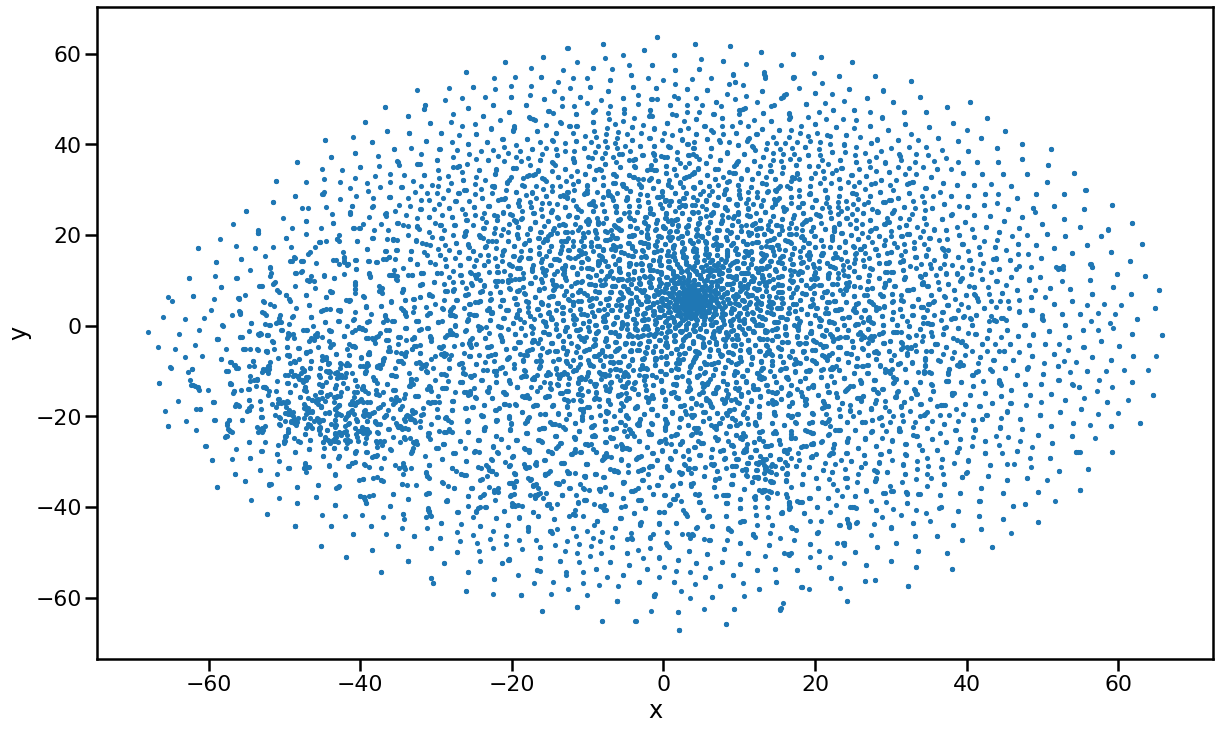

In [31]:
ax=points.plot.scatter("x", "y", s=10, figsize=(20, 12))

In [32]:
#distance,similarity and ranking
def plot_region(x_bounds, y_bounds):
    slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) & 
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1])
    ]
    
    ax = slice.plot.scatter("x", "y", s=35, figsize=(10, 8))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=11)

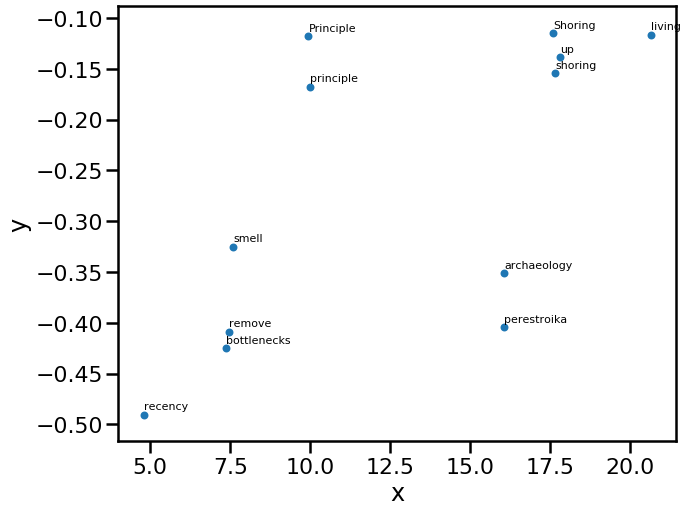

In [33]:
plot_region(x_bounds=(4, 30), y_bounds=(-0.5, -0.1))

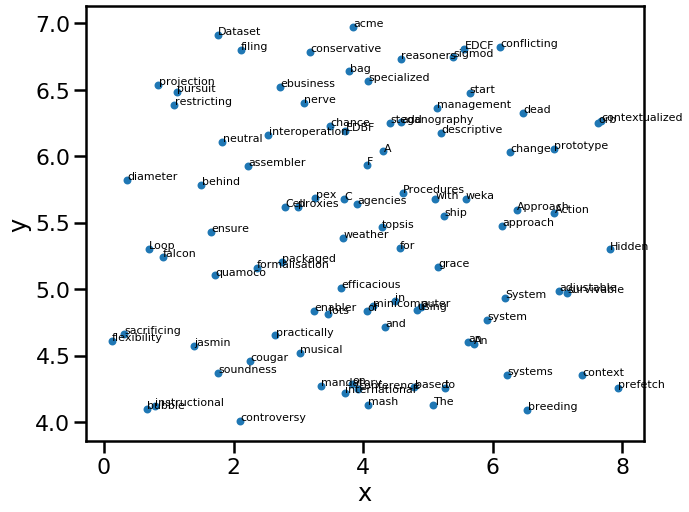

In [34]:
plot_region(x_bounds=(0, 8), y_bounds=(4, 7))

In [35]:
thrones2vec.wv.most_similar("information")

2020-04-21 20:19:48,475 : INFO : precomputing L2-norms of word weight vectors


[('Information', 0.47331222891807556),
 ('retrieve', 0.31083643436431885),
 ('retrieval', 0.30485770106315613),
 ('webgis', 0.30465465784072876),
 ('partners', 0.30384373664855957),
 ('irrigation', 0.2949897050857544),
 ('ride', 0.29066795110702515),
 ('extraction', 0.2862756550312042),
 ('topss', 0.28358590602874756),
 ('biomedical', 0.2822534441947937)]

In [34]:
thrones2vec.most_similar("analysis")

c:\users\priyanka motwani\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('Analysis', 0.3935493528842926),
 ('static', 0.3230006694793701),
 ('sheet', 0.32126522064208984),
 ('poly', 0.30515679717063904),
 ('variables', 0.29570889472961426),
 ('loans', 0.29130345582962036),
 ('IGBT', 0.2825721502304077),
 ('warnings', 0.2793927490711212),
 ('transformer', 0.279382586479187),
 ('libre', 0.27509835362434387)]

In [35]:
thrones2vec.most_similar("information")

c:\users\priyanka motwani\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('Information', 0.48988842964172363),
 ('geographic', 0.3722018003463745),
 ('webgis', 0.33656153082847595),
 ('drainage', 0.32229769229888916),
 ('topss', 0.3204391896724701),
 ('partners', 0.3098757565021515),
 ('irrigation', 0.3062514066696167),
 ('Mongolian', 0.2973647117614746),
 ('retrieve', 0.2963729500770569),
 ('incentives', 0.29364925622940063)]

In [36]:
def nearest_similarity_cosmul(start1, end1, end2):
    similarities = thrones2vec.most_similar_cosmul(
        positive=[end2, start1],
        negative=[end1]
    )
    start2 = similarities[0][0]
    print("{start1} is related to {end1}, as {start2} is related to {end2}".format(**locals()))
    return start2

In [43]:
nearest_similarity_cosmul("Curriculum", "Algorithms", "System")
nearest_similarity_cosmul("new", "Concurrent", "Framework")
nearest_similarity_cosmul("large", "software", "company")

Curriculum is related to Algorithms, as Institutions is related to System
new is related to Concurrent, as framework is related to Framework
large is related to software, as vldb is related to company


c:\users\priyanka motwani\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `most_similar_cosmul` (Method will be removed in 4.0.0, use self.wv.most_similar_cosmul() instead).
  after removing the cwd from sys.path.


'vldb'

In [38]:
points.tail(1000)

,word,x,y
6467,segment,-47.031898,-7.714905
6468,programmable,4.733790,2.351362
6469,et,-30.288727,-12.788992
6470,unleashing,3.517570,10.859474
6471,reconciliation,-5.668320,10.750235
...,...,...,...
7462,trie,-25.936409,19.652878
7463,bitemporal,-11.831970,1.607483
7464,orders,-14.959615,13.749496
7465,recursion,-29.290756,14.447757
